In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

# IMPORTING DATASET

In [2]:
dataset = pd.read_csv('global_co2.csv')
dataset

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


In [3]:
dataset=dataset.dropna()
dataset

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
199,1950,1630,97,423,1070,18,23,0.64
200,1951,1767,115,479,1129,20,24,0.69
201,1952,1795,124,504,1119,22,26,0.68
202,1953,1841,131,533,1125,24,27,0.69
203,1954,1865,138,557,1116,27,27,0.69
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


In [4]:
dataset.reset_index(drop=True)

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1950,1630,97,423,1070,18,23,0.64
1,1951,1767,115,479,1129,20,24,0.69
2,1952,1795,124,504,1119,22,26,0.68
3,1953,1841,131,533,1125,24,27,0.69
4,1954,1865,138,557,1116,27,27,0.69
...,...,...,...,...,...,...,...,...
56,2006,8370,1525,3089,3339,356,61,1.27
57,2007,8566,1572,3081,3464,382,68,1.28
58,2008,8783,1631,3122,3571,388,71,1.30
59,2009,8740,1585,3056,3620,413,66,1.28


In [5]:
x= dataset.iloc[:,:1].values
y = dataset.iloc[:,1].values

In [6]:
x

array([[1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010]], dtype=int64)

In [7]:
y

array([1630, 1767, 1795, 1841, 1865, 2042, 2177, 2270, 2330, 2454, 2569,
       2580, 2686, 2833, 2995, 3130, 3288, 3393, 3566, 3780, 4053, 4208,
       4376, 4614, 4623, 4596, 4864, 5026, 5087, 5369, 5315, 5152, 5113,
       5094, 5280, 5439, 5607, 5752, 5965, 6097, 6127, 6217, 6164, 6162,
       6266, 6398, 6542, 6651, 6643, 6610, 6765, 6927, 6996, 7416, 7807,
       8093, 8370, 8566, 8783, 8740, 9167], dtype=int64)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# POLYNOMIAL REGRESSION

In [15]:
# Add the polynomial term to the equation/model
from sklearn.preprocessing import PolynomialFeatures 
  
polynom = PolynomialFeatures(degree =5) 
x_polynom = polynom.fit_transform(x_train) 
polynom.fit(x_polynom,y_train)
x_polynom

array([[1.00000000e+00, 1.99100000e+03, 3.96408100e+06, 7.89248527e+09,
        1.57139382e+13, 3.12864509e+16],
       [1.00000000e+00, 1.98300000e+03, 3.93228900e+06, 7.79772909e+09,
        1.54628968e+13, 3.06629243e+16],
       [1.00000000e+00, 1.99300000e+03, 3.97204900e+06, 7.91629366e+09,
        1.57771733e+13, 3.14439063e+16],
       [1.00000000e+00, 1.99900000e+03, 3.99600100e+06, 7.98800600e+09,
        1.59680240e+13, 3.19200800e+16],
       [1.00000000e+00, 1.95700000e+03, 3.82984900e+06, 7.49501449e+09,
        1.46677434e+13, 2.87047738e+16],
       [1.00000000e+00, 1.96400000e+03, 3.85729600e+06, 7.57572934e+09,
        1.48787324e+13, 2.92218305e+16],
       [1.00000000e+00, 1.98200000e+03, 3.92832400e+06, 7.78593817e+09,
        1.54317294e+13, 3.05856878e+16],
       [1.00000000e+00, 2.00100000e+03, 4.00400100e+06, 8.01200600e+09,
        1.60320240e+13, 3.20800800e+16],
       [1.00000000e+00, 1.97900000e+03, 3.91644100e+06, 7.75063674e+09,
        1.53385101e+13, 

In [16]:
#Fit the Polynomial Regression Model 
from sklearn.linear_model import LinearRegression
PolyReg = LinearRegression() 
PolyReg.fit(x_polynom, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

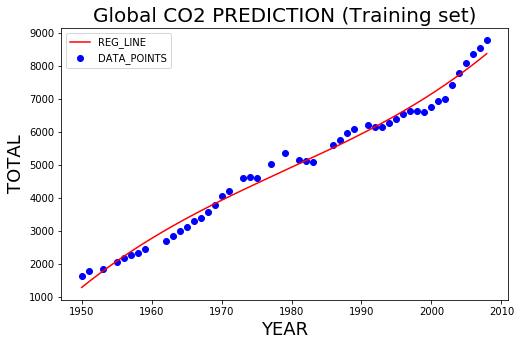

In [17]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
plt.figure(figsize=(8,5))
X_grid = np.arange(min(x_train), max(x_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_train, y_train, color = 'b',label="DATA_POINTS")
plt.plot(X_grid, PolyReg.predict(polynom.fit_transform(X_grid)), color = 'r',label="REG_LINE")
plt.title('Global CO2 PREDICTION (Training set)',fontsize=20)
plt.xlabel('YEAR',fontsize=18)
plt.ylabel('TOTAL',fontsize=18)
plt.legend()
  
  
plt.show()

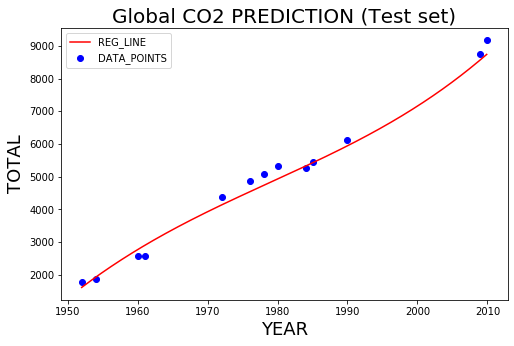

In [18]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
plt.figure(figsize=(8,5))
X_grid = np.arange(min(x_test), max(x_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_test, y_test, color = 'b',label="DATA_POINTS")
plt.plot(X_grid, PolyReg.predict(polynom.fit_transform(X_grid)), color = 'r',label="REG_LINE")
plt.title('Global CO2 PREDICTION (Test set)',fontsize=20)
plt.xlabel('YEAR',fontsize=18)
plt.ylabel('TOTAL',fontsize=18)
plt.legend()
  
  
plt.show()

 # prediction 

In [19]:
y2_pred=PolyReg.predict(polynom.fit_transform(x_test))


In [25]:
PolyReg.predict(polynom.fit_transform([[2011]]))

array([9758.798169])

In [26]:
PolyReg.predict(polynom.fit_transform([[2012]]))

array([9138.26772202])

In [27]:
PolyReg.predict(polynom.fit_transform([[2013]]))

array([9338.69438989])

# Accuracy

In [20]:
poly_acc=r2_score(y_test,y2_pred)
print(r2_score(y_test,y2_pred))

0.9869158417219419
